In [22]:
import scipy.stats as stats
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

In [24]:
df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


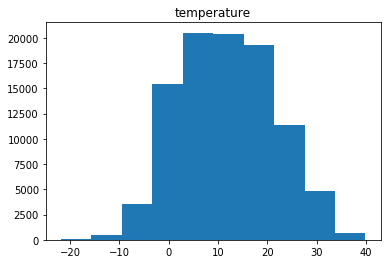

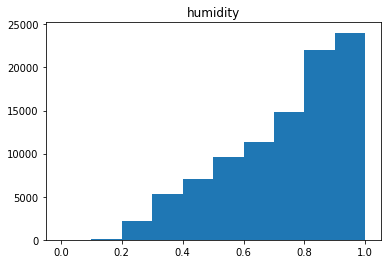

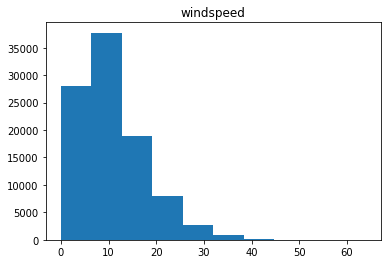

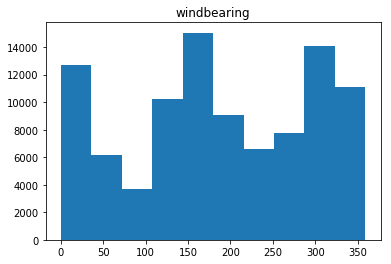

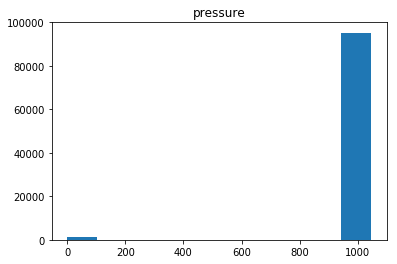

In [26]:
active_vars = ['temperature', 'humidity', 'windspeed', 'windbearing', 'pressure']
active_df = df[active_vars].copy()
plt.hist(df.temperature)
plt.title('temperature')
plt.show()
plt.hist(df.humidity)
plt.title('humidity')
plt.show()
plt.hist(df.windspeed)
plt.title('windspeed')
plt.show()
plt.hist(df.windbearing)
plt.title('windbearing')
plt.show()
plt.hist(df.pressure)
plt.title('pressure')
plt.show()

In [27]:
import statsmodels.api as sm

Y = active_df['temperature']
X = active_df.iloc[:, 1:]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:00:16   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Assumptions:
    1. linearity of models
    2. Error terms should be 0 on average
    3. homoscedasticity
    4. low multicollinearity
    5. error terms should be uncorrelated with each other
    6. features shouldn't be correlated with the errors

In [28]:
# 1. Linearity
# This one's easy, should be met because we used a model that assumes it.

In [29]:
# 2. Error terms should be 0 on average
predictions = results.predict(X)
errors = Y - predictions
print(np.mean(errors))
# Yep! Pretty darn close

9.967115112774813e-12


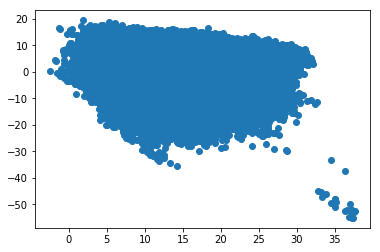

In [30]:
# 3. Homoscedasticity
plt.scatter(predictions, errors)

In [31]:
# Hmm...Some weird outliers there, not really sure. Let me run the tests.
from scipy.stats import bartlett
from scipy.stats import levene

print(bartlett(predictions, errors))
print(levene(predictions, errors))
# OK so we failed these tests with flying colors. This could mean we have weird outliers in our data,
# or that we have omitted variables that are important in explaining the variance. I would suspect since
# we are using so few features and that since we're modeling weather than both of these things are true.

BartlettResult(statistic=2464.8446568676018, pvalue=0.0)
LeveneResult(statistic=2321.2401008576994, pvalue=0.0)


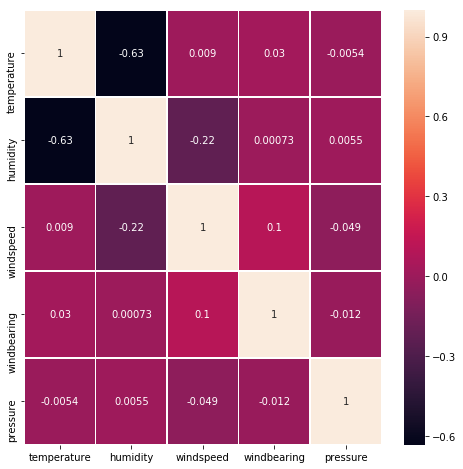

In [32]:
# 4. Low multicollinearity
plt.figure(figsize=(8,8))
sns.heatmap(active_df.corr(), linewidth=0.5, annot=True)
# Actually this looks pretty OK. Windspeed and humidity are -0.22, but that's the strongest.

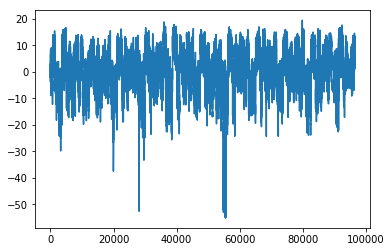

In [33]:
# 5. Error terms should be uncorrelated with one another
plt.plot(errors)
plt.show()

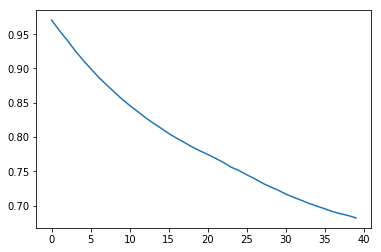

In [34]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [35]:
# Not exactly sure what's going  on here but it doesn't look right.

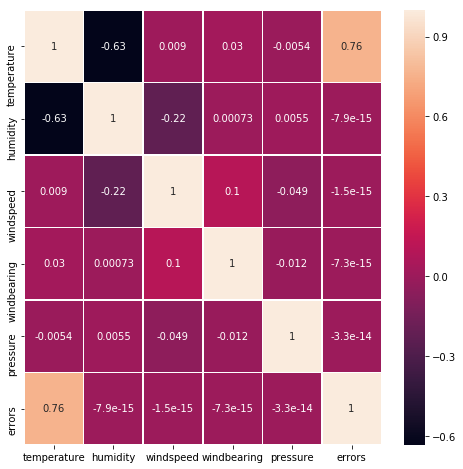

In [36]:
# 6. Features shouldn't be correlated with the errors
active_df['errors'] = errors
plt.figure(figsize=(8,8))
sns.heatmap(active_df.corr(), linewidth=0.5, annot=True)
plt.show()
# Features aren't correlated with the errors, but the target is!